<div style="display:block">
    <div style="width: 20%; display: inline-block; text-align: left;">
    </div>
    <div style="width: 59%; display: inline-block">
        <h1  style="text-align: center">ML Part 2: Exercises <span class="tocSkip"></span></h1>
        <div style="width: 90%; text-align: center; display: inline-block;"><i><strong>Author:</i> Advaith Shankar, Manasa Maganti, Shashank Rao, Varsha Manju Jayakumar <span class="tocSkip"></span></strong> </div>
        <div style="width: 90%; text-align: center; display: inline-block;"><i><strong>Creation Date:</i> August-18th-2024<span class="tocSkip"></span></strong> </div>
    </div>
    </div>
</div>

**Group Members:** 

Advaith Shankar (Eid: as235592)

Manasa Maganti (Eid: mm226524)

Shashank Rao (Eid: sr55952)

Varsha Manju Jayakumar (Eid: vm26476)


**Note:** This notebook consists of problems 1-7. The Last problem 'Image classification with neural networks' is uploaded as a separate notebook on the github repo

#### Probability Practice

***Part A***

Category of visitors  --> Random Clicker (RC) and Truthful Clickers (TC)

P(RC) = 0.3
P(TC) = 0.7

Survey has only Yes or No hence, P(Yes) = 0.5 and P(No) = 0.5 

Post Survey, 

P(Y) = 0.65
P(N) = 0.35

Using Total Probability to calculate What fraction of people who are truthful clickers answered yes,

P(Y) = P(Y|TC).P(TC) + P(Y|RC).P(RC)

0.65 = P(Y|TC).0.7 + (0.5)(0.3)

P(Y|TC) = 0.5/0.7


**P(Y|TC) = 0.71428571**

<br>

***Part B***

Sensitivity = 0.993 
Specificity = 0.979

P(Positive|With Disease) = 0.993
P(Negative|With Disease) = 1-0.993 = 0.007 

P(Positive|No Disease) = 1-0.9999 = 0.0001
P(Negative|No Disease) = 0.9999

P(Disease) = 0.000025
P(No Disease) = 1 - 0.00025 = 0.999975

Using Baye's theroem 

P(Disease|Positive) = P(D) . P(Positive|Disease) / P(Positive)

                    = (0.000025)(0.993) / P(Positive)

*Calculation of P(Positive)*

P(Positive) = P(Disease) * P(Positive | Disease) + P(No Disease) * P(Positive | No Disease)

P(Positive) = (0.000025)(0.993) + (0.999975)(0.0001)

P(Positive) = 0.0001248225

P(Disease|Positive) = (0.000025)(0.993) / 0.0001248225

**P(Disease|Positive) = 0.0001248**



<br>

#### Wrangling the Billboard Top 100

In [230]:
from pandas import Series, DataFrame
import pandas as pd

***Part A***

In [232]:
df = pd.read_csv('/Users/advaith/Desktop/MSBA Related coursework/Summer term/Intro to ML/2nd Half/billboard.csv')

mask = df['year'] >= 1958

df_top = df[mask]

df_top_10 = df_top.groupby(['performer', 'song'], as_index=False)['weeks_on_chart'].sum()

df_top_10 = df_top_10.sort_values('weeks_on_chart', ascending=False).head(10)

df_top_10.rename(columns={'weeks_on_chart': 'count'}, inplace=True)

df_top_10.reset_index(drop=True)

performer  \
0                            Imagine Dragons   
1                                 AWOLNATION   
2                                 Jason Mraz   
3                                 The Weeknd   
4                                LeAnn Rimes   
5                                OneRepublic   
6  LMFAO Featuring Lauren Bennett & GoonRock   
7                                      Adele   
8                                      Jewel   
9                           Carrie Underwood   

                                  song  count  
0                          Radioactive   3828  
1                                 Sail   3160  
2                            I'm Yours   2926  
3                      Blinding Lights   2926  
4                        How Do I Live   2415  
5                       Counting Stars   2346  
6                    Party Rock Anthem   2346  
7                  Rolling In The Deep   2145  
8  Foolish Games/You Were Meant For Me   2145  
9                     Before He Cheats   2080

***Part B***

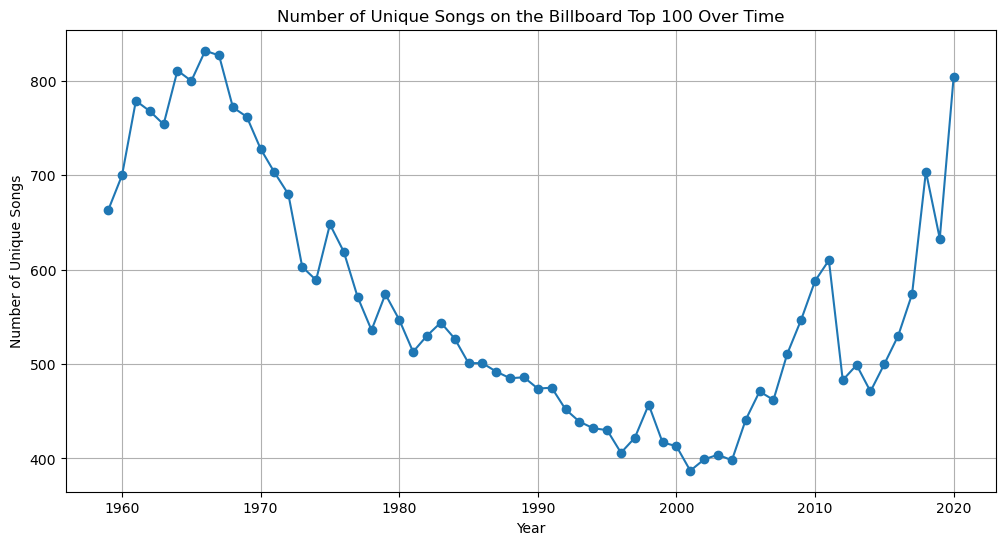

In [234]:
df = pd.read_csv('/Users/advaith/Desktop/MSBA Related coursework/Summer term/Intro to ML/2nd Half/billboard.csv')

mask = (df['year'] != 1958) & (df['year'] != 2021)
df = df[mask]

song_counts = df.groupby('year')['song_id'].nunique().reset_index()

song_counts.columns = ['Year', 'Number of Unique Songs']

plt.figure(figsize=(12, 6))
plt.plot(song_counts['Year'], song_counts['Number of Unique Songs'], marker='o')
plt.title('Number of Unique Songs on the Billboard Top 100 Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Unique Songs')
plt.grid(True)

plt.show()

***Part C***

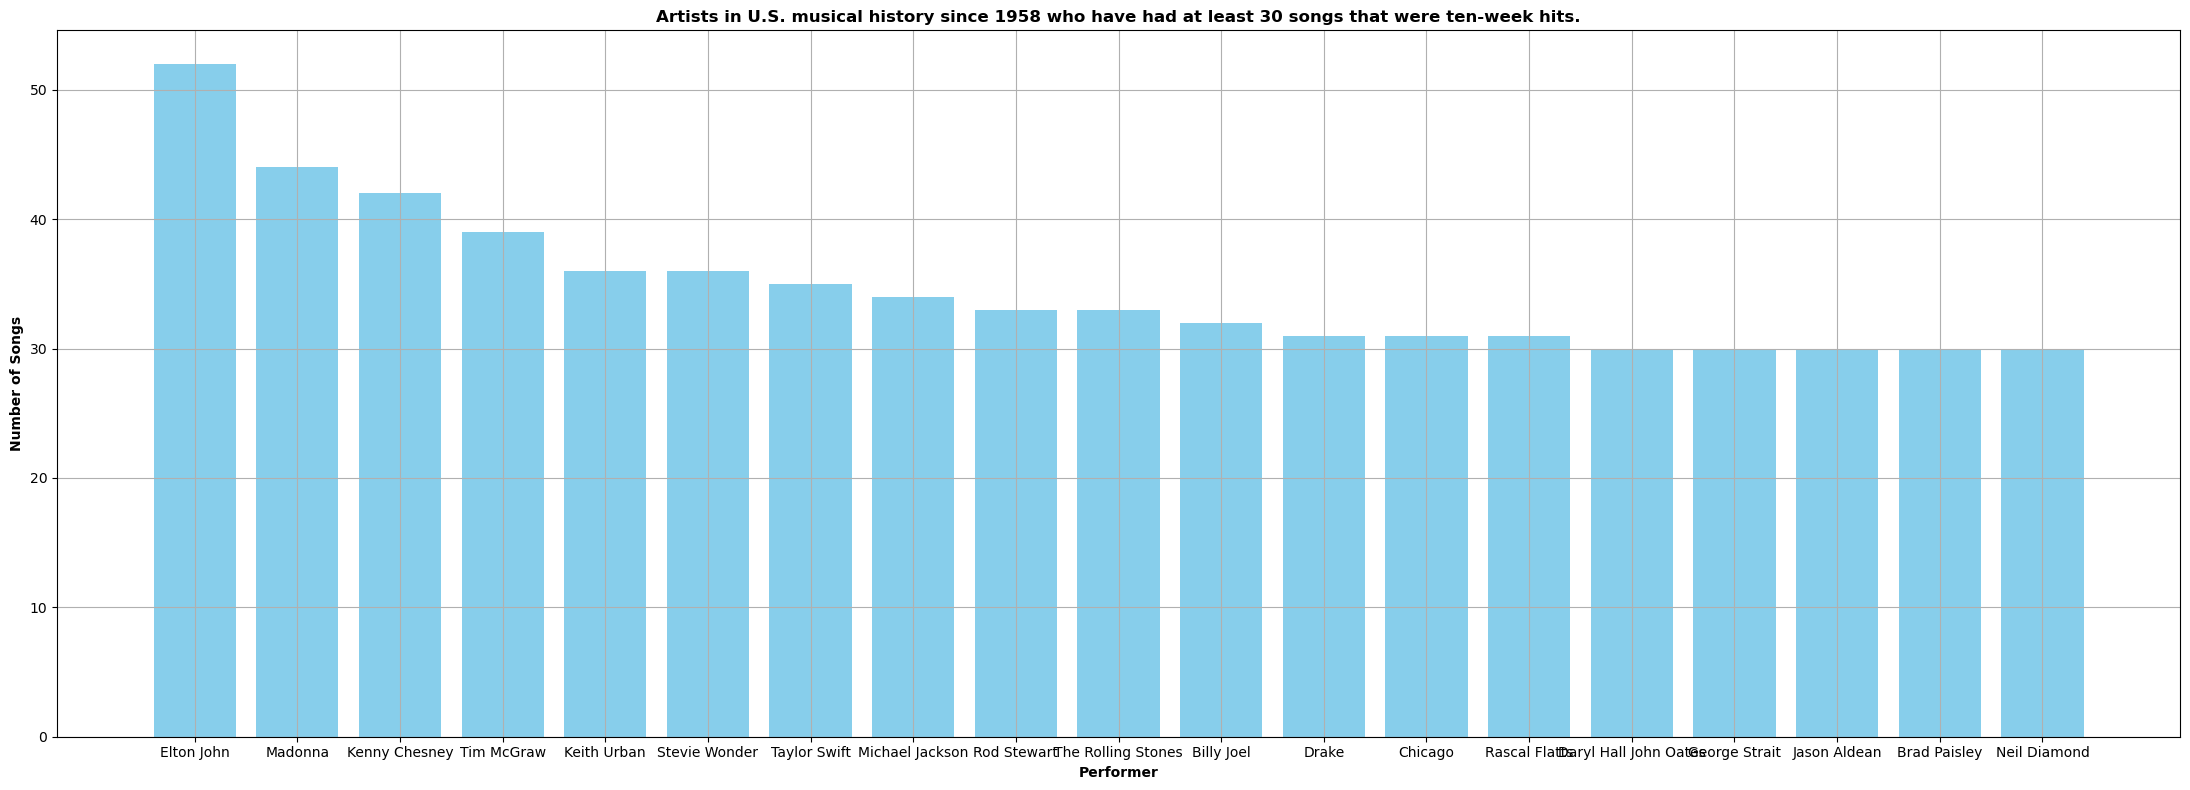

In [236]:
df = pd.read_csv('/Users/advaith/Desktop/MSBA Related coursework/Summer term/Intro to ML/2nd Half/billboard.csv')

mask = df['weeks_on_chart'] >= 10

df = df[mask]

df_count = df.groupby('performer')['song_id'].nunique().reset_index()

mask = df_count['song_id'] >= 30

df_p = df_count[mask]

df_p = df_p.sort_values('song_id' , ascending = False)

plt.figure(figsize=(22,8))
plt.bar(df_p['performer'], df_p['song_id'], color='skyblue')
plt.title('Artists in U.S. musical history since 1958 who have had at least 30 songs that were ten-week hits.',fontweight='bold' )
plt.xlabel('Performer', fontweight='bold')
plt.ylabel('Number of Songs', fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()

<br>

#### Visual story telling part 1: Green Buildings

In [238]:
df = pd.read_csv('/Users/advaith/Desktop/MSBA Related coursework/Summer term/Intro to ML/2nd Half/greenbuildings.csv')

df.head(20)

CS_PropertyID  cluster    size  empl_gr   Rent  leasing_rate  stories  \
0          379105        1  260300     2.22  38.56         91.39       14   
1          122151        1   67861     2.22  28.57         87.14        5   
2          379839        1  164848     2.22  33.31         88.94       13   
3           94614        1   93372     2.22  35.00         97.04       13   
4          379285        1  174307     2.22  40.69         96.58       16   
5           94765        1  231633     2.22  43.16         92.74       14   
6          236739        6  210038     4.01  12.50         94.33       11   
7          234578        6  225895     4.01  14.77         91.02       15   
8           42087        6  912011     4.01  17.00         99.32       31   
9          233989        6  518578     4.01  17.00         93.54       21   
10         236704        6  241294     4.01  17.00         83.61       11   
11         234263        6  255305     4.01  18.00         95.69       15   
12         234298        6  254920     4.01  18.00        100.00       15   
13         233940        6  745956     4.01  19.00         95.62       31   
14         233941        6  746824     4.01  19.00         67.48       31   
15         239670        6   85000     4.01  19.50         85.41        7   
16         431225        8  409889    67.78  30.50         97.06       20   
17         104642        8   28000    67.78  12.51         63.87        3   
18         224619        8   69142    67.78  15.20         79.65        8   
19         625220        8   72500    67.78  18.58          0.00       10   

    age  renovated  class_a  ...  green_rating  net  amenities  cd_total_07  \
0    16          0        1  ...             1    0          1         4988   
1    27          0        0  ...             0    0          1         4988   
2    36          1        0  ...             0    0          1         4988   
3    46          1        0  ...             0    0          0         4988   
4     5          0        1  ...             0    0          1         4988   
5    20          0        1  ...             0    0          1         4988   
6    38          0        0  ...             1    0          1         2746   
7    24          0        1  ...             0    0          1         2746   
8    34          0        1  ...             0    0          1         2746   
9    36          1        1  ...             0    0          1         2746   
10   32          0        1  ...             0    0          1         2746   
11   25          0        1  ...             0    0          1         2746   
12   26          0        1  ...             0    0          1         2746   
13   28          0        1  ...             0    0          1         2746   
14   29          0        1  ...             0    0          1         2746   
15   40          1        0  ...             0    0          0         2746   
16    6          0        1  ...             1    0          0         5240   
17   56          0        0  ...             0    0          0         5240   
18   56          0        0  ...             0    0          0         5240   
19   57          0        0  ...             0    0          0         5240   

    hd_total07  total_dd_07  Precipitation  Gas_Costs  Electricity_Costs  \
0           58         5046          42.57   0.013700           0.029000   
1           58         5046          42.57   0.013731           0.029045   
2           58         5046          42.57   0.013731           0.029045   
3           58         5046          42.57   0.013731           0.029045   
4           58         5046          42.57   0.013731           0.029045   
5           58         5046          42.57   0.013731           0.029045   
6         1670         4416          25.55   0.010100           0.028900   
7         1670         4416          25.55   0.010118           0.028869   
8         1670         4416          25.55

Repeating what the "total Excel guru from his undergrad statistics course" did to check if any false information was reported

In [240]:
mask = df['leasing_rate'] > 10 #Removing buildings in the data set had very low occupancy rates (less than 10% of available space occupied).
df_cleaned = df[mask]

mask = df_cleaned['green_rating'] == 1
green = df_cleaned[mask]

m_green = green['Rent'].median()
print("Median rent price for green buildings",m_green)

mask = df_cleaned['green_rating'] == 0
non_green = df_cleaned[mask]

m_non_green = non_green['Rent'].median()
print("Median rent price for non green buildings",m_non_green)
print("\n")
print("Rent Revenue for green buildings:" , m_green*250000)
print("Rent Revenue for non green buildings:", m_non_green*250000)
print("Difference of Rents if green building built:", 6900000.0-6265000.0)


Median rent price for green buildings 27.6
Median rent price for non green buildings 25.03


Rent Revenue for green buildings: 6900000.0
Rent Revenue for non green buildings: 6257500.0
Difference of Rents if green building built: 635000.0


We can see the first falacy here where "total Excel guru" went wrong. The guru reported a difference of revenue as 650000 if you construct a green building but in reality the difference is 635000

<br>

The expected baseline construction cost of the building is $100,000,000 for a non-green building.

For a green building considering it's a '5%' premium then the total cost is $105,000,000. 


In [242]:
print("The number of years required to recoup the cost for a non green building is:", 100000000/6415000)
print("The number of years required to recoup the cost for a green building is:", 105000000/6750000 , "years")

The number of years required to recoup the cost for a non green building is: 15.58846453624318
The number of years required to recoup the cost for a green building is: 15.555555555555555 years


The recouping of amounts is negligible when compared to a green building and non green building. 

When considering only a 90% occupancy rate as the "excel guru" did: 

In [244]:
occ = 0.9
g_rent_occ = 0.9*m_green*250000
non_g_rent_occ = 0.9*m_non_green*250000

print("The number of years required to recoup the cost for a non green building is:", 100000000/non_g_rent_occ)
print("The number of years required to recoup the cost for a green building is:", 105000000/g_rent_occ)
print("\n")

x = 30-17.320516151381312
y = 30-17.28395061728395

print("Profits generated for non green building if it runs on 90% occupancy for 30 years:" ,non_g_rent_occ * x)
print("Profits generated for green building if it runs on 90% occupancy for 30 years:", g_rent_occ * y)

The number of years required to recoup the cost for a non green building is: 17.756470013761263
The number of years required to recoup the cost for a green building is: 16.90821256038647


Profits generated for non green building if it runs on 90% occupancy for 30 years: 71407683.16445829
Profits generated for green building if it runs on 90% occupancy for 30 years: 78966666.66666669


*Although, I agree with the recommendation of the "excel guru" suggesting the green building compared to the non-green building. The numbers reported were incorrect for this analysis.*


This analysis seems to be only on the surface level. There can be additional deep dived analysis which can supplement the above analysis to make a more well informed decision

Checking for any confounding variables

In [248]:
df_cleaned.corrwith(df_cleaned["Rent"])

CS_PropertyID       -0.162281
cluster              0.169325
size                 0.133259
empl_gr             -0.023789
Rent                 1.000000
leasing_rate         0.179189
stories              0.111098
age                 -0.101336
renovated           -0.126678
class_a              0.206717
class_b             -0.126564
LEED                 0.006196
Energystar           0.029863
green_rating         0.029802
net                 -0.053985
amenities            0.052868
cd_total_07         -0.162495
hd_total07          -0.160682
total_dd_07         -0.249341
Precipitation        0.067944
Gas_Costs            0.003172
Electricity_Costs    0.395391
cluster_rent         0.758213
dtype: float64

In [250]:
df_cleaned.corrwith(df_cleaned["green_rating"])

CS_PropertyID       -0.017093
cluster              0.026050
size                 0.090172
empl_gr              0.012203
Rent                 0.029802
leasing_rate         0.084745
stories              0.038394
age                 -0.225238
renovated           -0.108141
class_a              0.248115
class_b             -0.167642
LEED                 0.269118
Energystar           0.961806
green_rating         1.000000
net                  0.036251
amenities            0.119240
cd_total_07          0.058752
hd_total07          -0.102137
total_dd_07         -0.069059
Precipitation       -0.051304
Gas_Costs           -0.030707
Electricity_Costs    0.023148
cluster_rent        -0.020438
dtype: float64

There is a major confounding variable for Rent which is electricity cost but that is corelated directly to the size of the building and not specifically if it's a green building or not. 

There is a major confounding variable to green rating which is the year-on-year growth rate in employment in the building's geographic region.

Hence, investigating on this

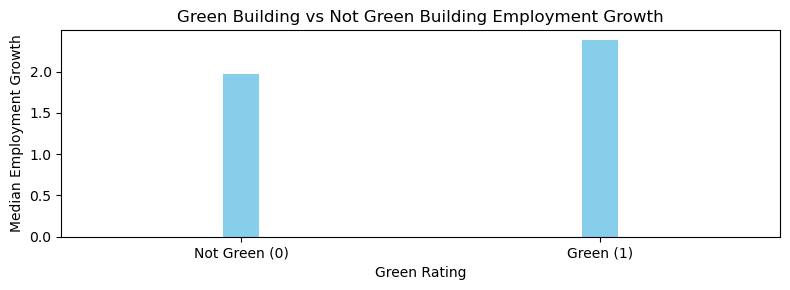

In [257]:
x = df_cleaned.groupby('green_rating')['empl_gr'].median()

x = x.reset_index()

plt.figure(figsize=(8,3))
plt.bar(x['green_rating'], x['empl_gr'], color='skyblue', width = 0.1)
plt.xticks([0, 1], labels=['Not Green (0)', 'Green (1)'])
plt.xlim(-0.5, 1.5)
plt.xlabel('Green Rating')
plt.ylabel('Median Employment Growth')
plt.title('Green Building vs Not Green Building Employment Growth')
plt.tight_layout()



We can see green buildings has a higher median employment growth as compared to non green buildings which indicate there will always be a demand for green buildings and hence can help in more profit generation. It can be thought of that in the longer run green buildings will have prolonged occupancy rates since they promote the employment growth in the geographic reigon due to perhaps for the good PR.

#### Visual story telling part 2: Capital Metro data

In [305]:
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
cap_df = pd.read_csv('/Users/advaith/Desktop/MSBA Related coursework/Summer term/Intro to ML/2nd Half/capmetro_UT.csv')

In [307]:
cap_df.head(2)

timestamp  boarding  alighting day_of_week  temperature  \
0  2018-09-01 06:00:00         0          1         Sat        74.82   
1  2018-09-01 06:15:00         2          1         Sat        74.82   

   hour_of_day month  weekend  
0            6   Sep  weekend  
1            6   Sep  weekend

**Hypothesis - Avg rate of change of boarding and alighting is greater during weekdays as compared to weekends**

In [309]:
cap_df['is_weekend'] = cap_df['weekend'].apply(lambda x: x == 'weekend')
cap_df['timestamp'] = pd.to_datetime(cap_df['timestamp'])

weekday_vs_weekend = cap_df.groupby('is_weekend').agg({
    'boarding': 'mean',
    'alighting': 'mean'
}).reset_index()


weekday_vs_weekend['day_type'] = weekday_vs_weekend['is_weekend'].apply(lambda x: 'Weekend' if x else 'Weekday')

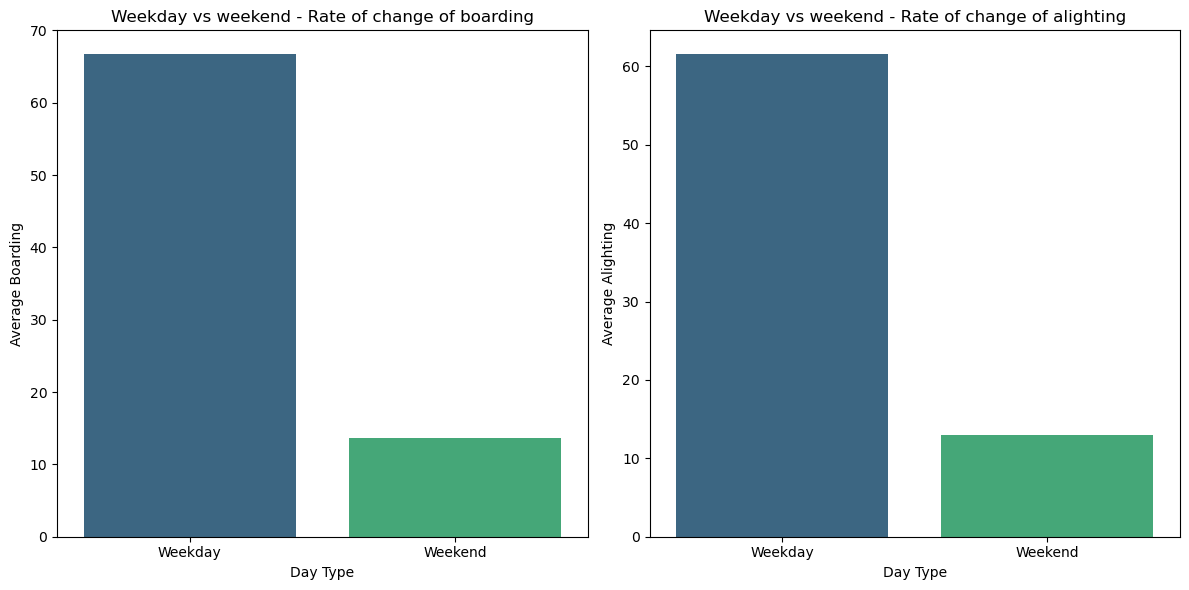

In [311]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='day_type', y='boarding', data=weekday_vs_weekend, palette='viridis')
plt.title('Weekday vs weekend - Rate of change of boarding')
plt.xlabel('Day Type')
plt.ylabel('Average Boarding')


plt.subplot(1, 2, 2)
sns.barplot(x='day_type', y='alighting', data=weekday_vs_weekend, palette='viridis')
plt.title('Weekday vs weekend - Rate of change of alighting')
plt.xlabel('Day Type')
plt.ylabel('Average Alighting')

plt.tight_layout()
plt.show()

The above graph depicts that there is greater rate of commute during weekdays as compared to weekends. This could possible be subjected to the fact that more number of commuters could be students

**Hypothesis - The hourly trend of boarding and alighting is similar across weekdays and weekends.** 

In [318]:
weekday_df = cap_df[cap_df['is_weekend'] == False]
weekend_df = cap_df[cap_df['is_weekend'] == True]

weekday_trend = weekday_df.groupby('hour_of_day').agg({
    'boarding': 'sum',
    'alighting': 'sum'
}).reset_index()

weekend_trend = weekend_df.groupby('hour_of_day').agg({
    'boarding': 'sum',
    'alighting': 'sum'
}).reset_index()


plt.figure(figsize=(15, 14))

plt.subplot(2, 1, 1)
sns.lineplot(x='hour_of_day', y='boarding', data=weekday_trend, label='Boarding', marker='o',color='green')
sns.lineplot(x='hour_of_day', y='alighting', data=weekday_trend, label='Alighting', marker='o',color='red')
plt.title('Weekday - Hourly Trend of Boarding and Alighting')
plt.xlabel('Hour of Day')
plt.ylabel('Number of People')
plt.legend()


plt.subplot(2, 1, 2)
sns.lineplot(x='hour_of_day', y='boarding', data=weekend_trend, label='Boarding', marker='o',color='green')
sns.lineplot(x='hour_of_day', y='alighting', data=weekend_trend, label='Alighting', marker='o',color='red')
plt.title('Weekend - Hourly Trend of Boarding and Alighting')
plt.xlabel('Hour of Day')
plt.ylabel('Number of People')
plt.legend()
plt.tight_layout()
plt.show()

Boarding and alighting are generally higher during peak hours in the morning and late afternoon during weekdays. However, the patterns are more stable throughout the day on weekends.

**Hypothesis - The rate of change of boarding and alighting is similar across different hours of the day**

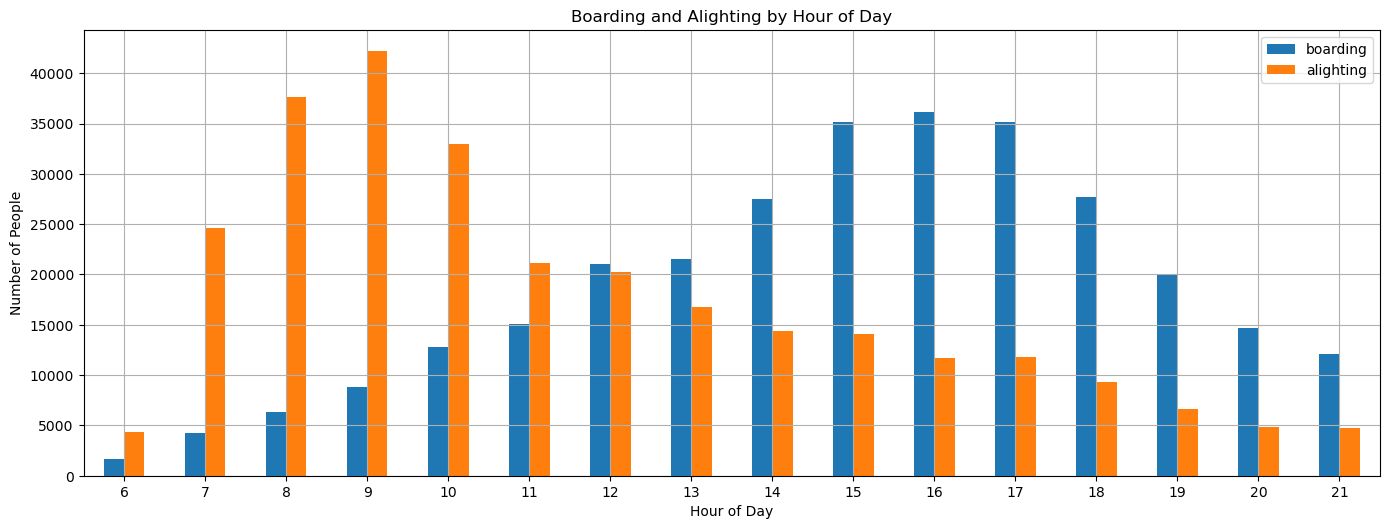

In [333]:
# Group by 'hour_of_day' and calculate the sum of 'boarding' and 'alighting'
hourly_data = cap_df.groupby('hour_of_day').agg({
    'boarding': 'sum',
    'alighting': 'sum'
}).reset_index()

# Plotting
plt.figure(figsize=(14, 10))

# Bar Chart for Boarding and Alighting by Hour
plt.subplot(2, 1, 1)
hourly_data.plot(kind='bar', x='hour_of_day', y=['boarding', 'alighting'], ax=plt.gca())
plt.title('Boarding and Alighting by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of People')
plt.xticks(rotation=0)
plt.grid(True)


plt.tight_layout()
plt.show()

From the above graph we can conclude that the rate of alighting is greater during the first half of the day between 7am-11am and decreases as the day ends. However, the rate of boarding increases during the second half of the day between 2pm to 6pm. 

I also plotted the rate of boarding and deboarding wrt temperature, but since there was no significant correlation or trends wrt these variables, I have excluded them from the analysis

#### Clustering and dimensionality reduction

In [260]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px 

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [262]:
df = pd.read_csv('/Users/advaith/Desktop/MSBA Related coursework/Summer term/Intro to ML/2nd Half/wine.csv')
df.head(10)

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red  
5      9.4        5   red  
6      9.4        5   red  
7     10.0        7   red  
8      9.5        7   red  
9     10.5        5   red

In [264]:
df_properties = df.drop(columns=['quality','color'])

In [266]:
df_properties.head(10)

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4  
5      9.4  
6      9.4  
7     10.0  
8      9.5  
9     10.5

***Running T-SNE for bifurcation of red and white wines***

In [268]:
scaler = StandardScaler()

In [270]:
vars_to_standardize = ['fixed.acidity' , 'volatile.acidity' , 'citric.acid' , 'residual.sugar' , 'chlorides' , 'free.sulfur.dioxide' , 'total.sulfur.dioxide' , 'density' , 'pH' , 'sulphates', 'alcohol']
scaler = StandardScaler()
df_properties[vars_to_standardize] = scaler.fit_transform(df_properties[vars_to_standardize])

tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=200)

tsne_results = tsne.fit_transform(df_properties[vars_to_standardize])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6497 samples in 0.003s...
[t-SNE] Computed neighbors for 6497 samples in 0.288s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6497
[t-SNE] Computed conditional probabilities for sample 2000 / 6497
[t-SNE] Computed conditional probabilities for sample 3000 / 6497
[t-SNE] Computed conditional probabilities for sample 4000 / 6497
[t-SNE] Computed conditional probabilities for sample 5000 / 6497
[t-SNE] Computed conditional probabilities for sample 6000 / 6497
[t-SNE] Computed conditional probabilities for sample 6497 / 6497
[t-SNE] Mean sigma: 0.697145
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.147095
[t-SNE] KL divergence after 1000 iterations: 1.407284


In [33]:
#varying perplexity paramater 
perplexities = [1, 5, 10, 20, 30, 40, 50, 75, 100]
fig, axs = plt.subplots(3, 3, figsize=(15,15))

axs = axs.flatten()

for i, perplexity in enumerate(perplexities):
     tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=1000, learning_rate=200)
     tsne_results = tsne.fit_transform(df_properties[vars_to_standardize])
     tsne_df = pd.DataFrame(data = tsne_results, columns = ['Dim1', 'Dim2'])
     tsne_df['Wine Color'] = df['color'].values
     scatter = axs[i].scatter(tsne_df['Dim1'], tsne_df['Dim2'],c=tsne_df['Wine Color'].map({'red':'red', 'white':'grey'}))
     axs[i].set_title(f'Perplexity: {perplexity}')
     axs[i].set_xticks([])
     axs[i].set_yticks([])

plt.tight_layout()
plt.show()


Red wine is indicated by the red dots and white wines are indicated by the grey dots.

We can see the perplexity of 30 through 50 shows the best clustering. They do show similar clustering of red and white wine but there is a distinct separation between the two without losing the small intricate white wine dots within the red clusters

***Running T-SNE and checking for bifurcation on wine quality.***

Let blue indicate good quality wine (6+) and green indicate lower quality wine (1 through 5)


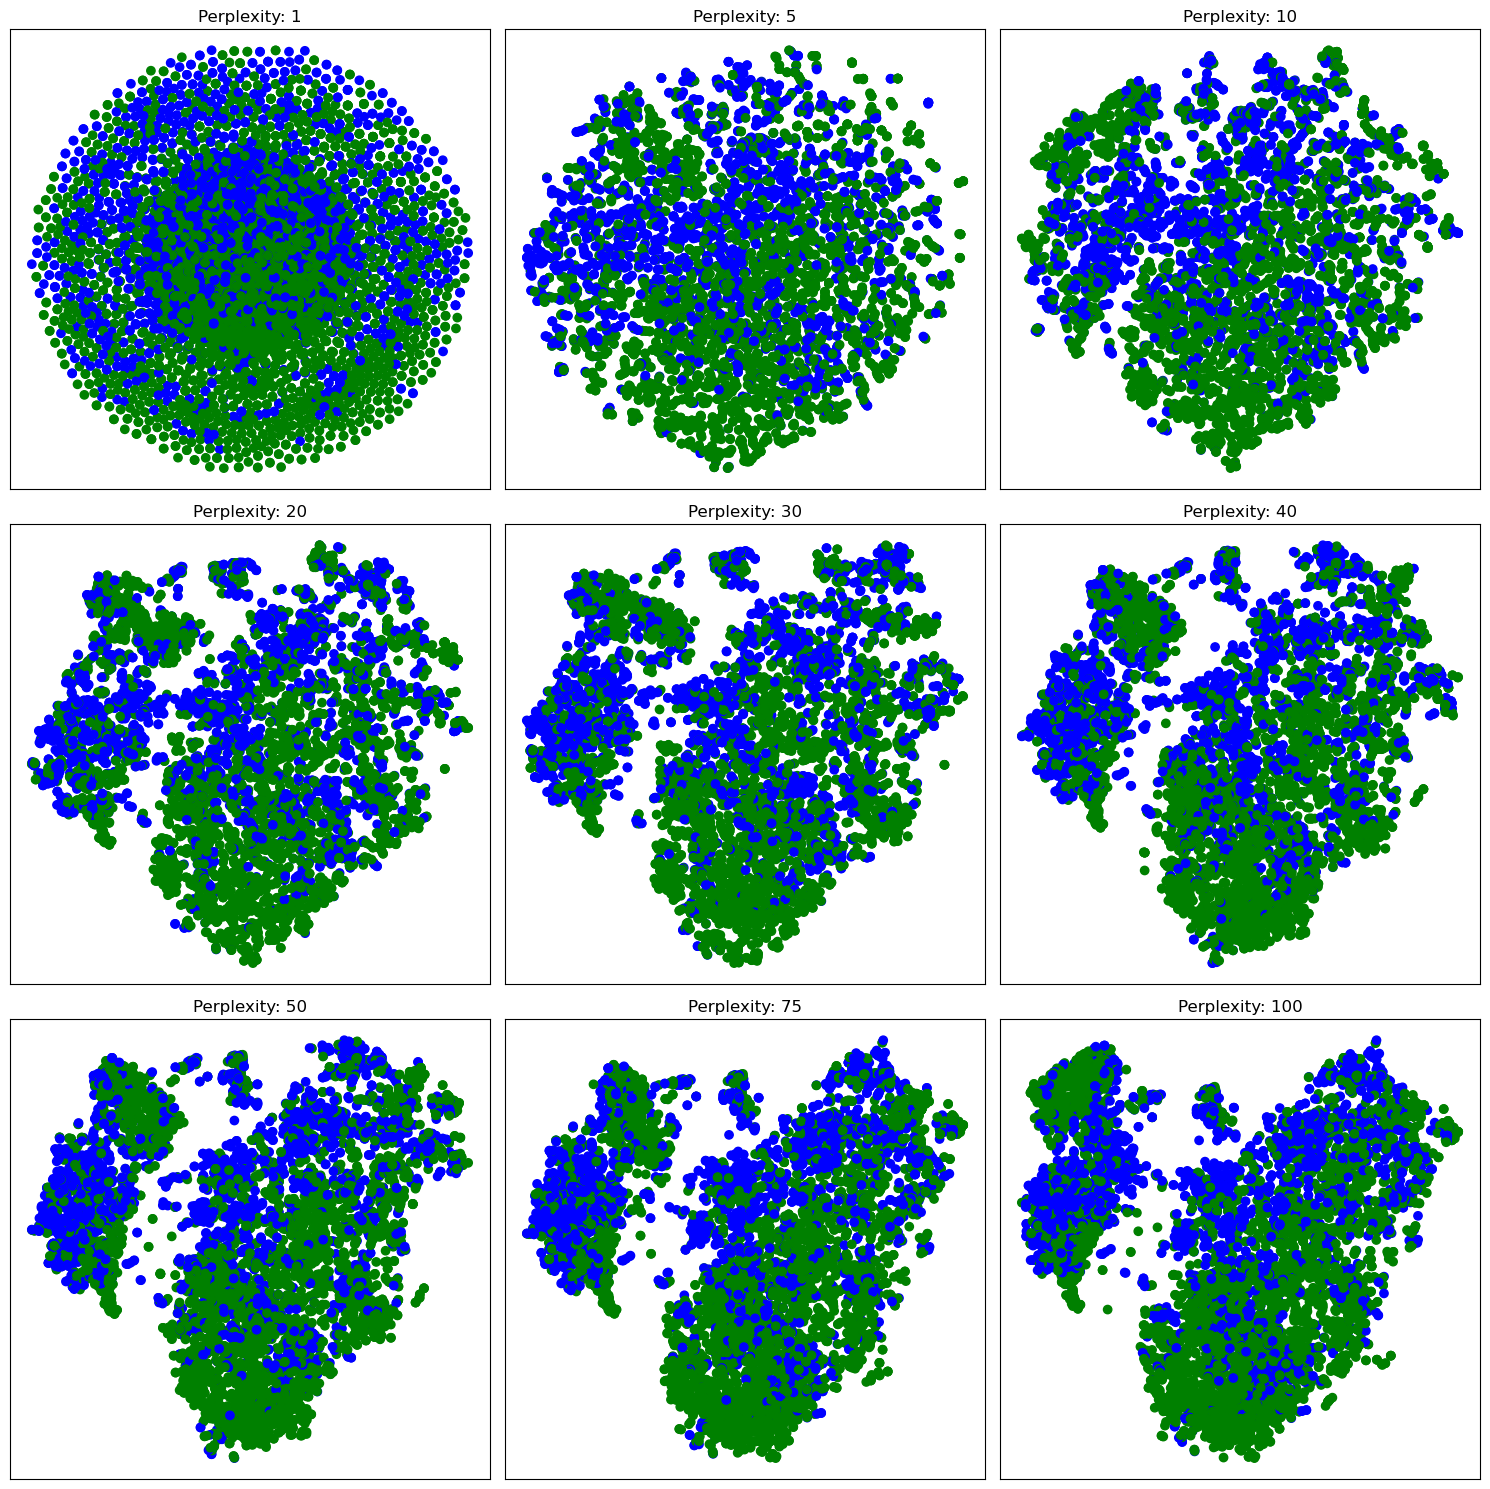

In [309]:
perplexities = [1, 5, 10, 20, 30, 40, 50, 75, 100]
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

axs = axs.flatten()

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=1000, learning_rate=200)
    tsne_results = tsne.fit_transform(df_properties[vars_to_standardize])
    tsne_df = pd.DataFrame(data=tsne_results, columns=['Dim1', 'Dim2'])
    tsne_df['Quality'] = 'High'
    
    # Apply the condition using a loop
    for index in range(len(tsne_df)):
        if df['quality'].iloc[index] > 5:
            tsne_df.at[index, 'Quality'] = 'Low'

    # Plot
    scatter = axs[i].scatter(tsne_df['Dim1'], tsne_df['Dim2'], c=tsne_df['Quality'].map({'High': 'blue', 'Low': 'green'}))
    axs[i].set_title(f'Perplexity: {perplexity}')
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.tight_layout()
plt.show()

Running t-SNE on wine quality does not seem to be doing very well. The clustering is not very apparent and separate

***Running PCA and then t-SNE to check bifurcation of red and white wine***

In [414]:
explained_variance = []
for i in range(1,12):
    pca = PCA(n_components=i)
    pca_results = pca.fit_transform(df_properties[vars_to_standardize])
    explained_variance.append(np.sum(pca.explained_variance_ratio_))
    print(f'Number of components: {i}, Cumulative explained variance: {explained_variance[-1]:.4f}')

Number of components: 1, Cumulative explained variance: 0.2754
Number of components: 2, Cumulative explained variance: 0.5022
Number of components: 3, Cumulative explained variance: 0.6436
Number of components: 4, Cumulative explained variance: 0.7319
Number of components: 5, Cumulative explained variance: 0.7973
Number of components: 6, Cumulative explained variance: 0.8525
Number of components: 7, Cumulative explained variance: 0.9001
Number of components: 8, Cumulative explained variance: 0.9457
Number of components: 9, Cumulative explained variance: 0.9763
Number of components: 10, Cumulative explained variance: 0.9970
Number of components: 11, Cumulative explained variance: 1.0000


***From printing out the variance for each component, we can see for component of 7  gives you a variance of 90%. Hence we will consider number of components as 7 in the upcoming codes for t-SNE***

In [422]:
pca = PCA(n_components=7)
pca_results = pca.fit_transform(df_properties[vars_to_standardize])


perplexities = [1, 5, 10, 20, 30, 40, 50, 75, 100]
fig, axs = plt.subplots(3, 3, figsize=(15,15))

axs = axs.flatten()

for i, perplexity in enumerate(perplexities):
     tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=1000, learning_rate=200)
     tsne_results = tsne.fit_transform(pca_results)
     tsne_df = pd.DataFrame(data = tsne_results, columns = ['Dim1', 'Dim2'])
     tsne_df['Wine Color'] = df['color'].values
     scatter = axs[i].scatter(tsne_df['Dim1'], tsne_df['Dim2'],c=tsne_df['Wine Color'].map({'red':'red', 'white':'grey'}))
     axs[i].set_title(f'Perplexity: {perplexity}')
     axs[i].set_xticks([])
     axs[i].set_yticks([])

plt.tight_layout()
plt.show()


***Running PCA and then running T-SNE and checking for bifurcation on wine quality***

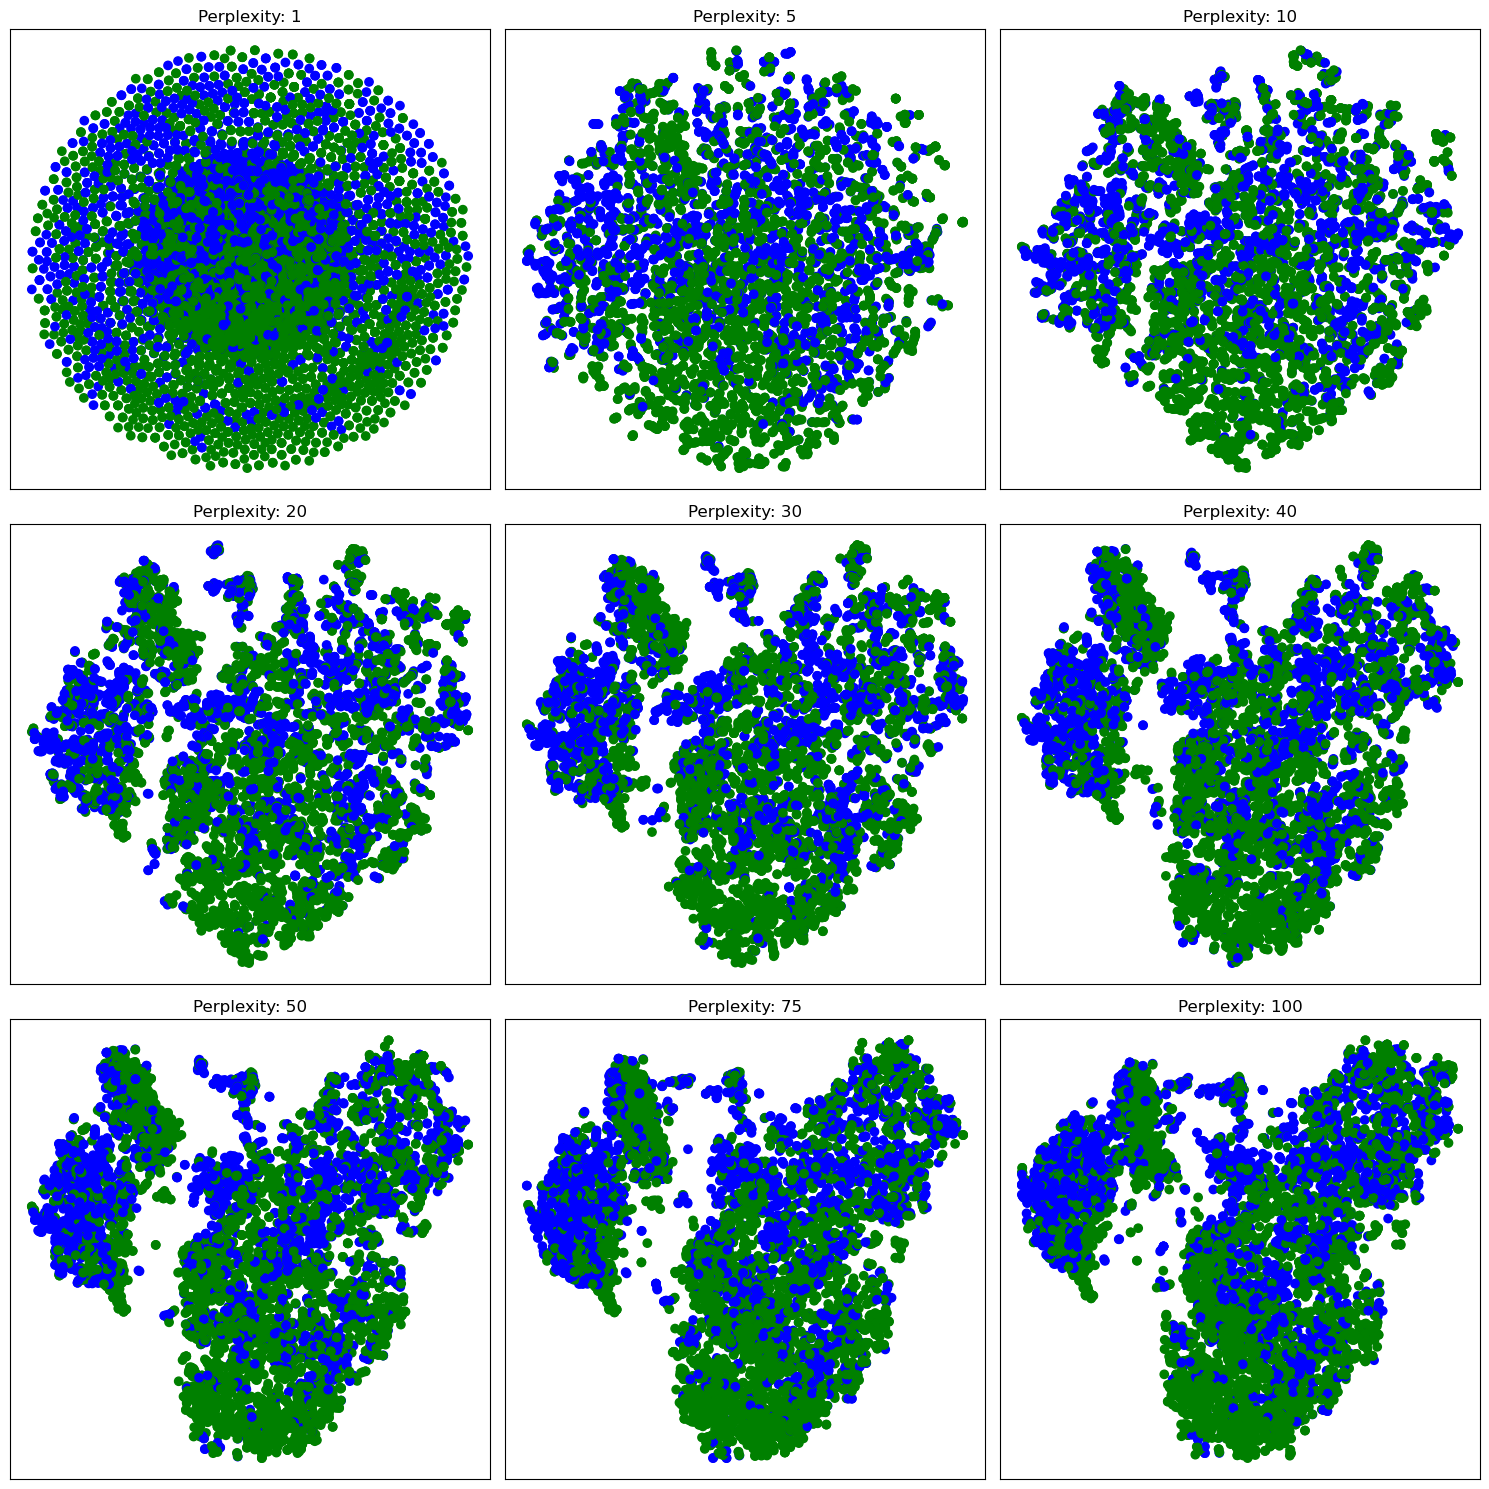

In [424]:
pca = PCA(n_components=7)
pca_results = pca.fit_transform(df_properties[vars_to_standardize])


perplexities = [1, 5, 10, 20, 30, 40, 50, 75, 100]
fig, axs = plt.subplots(3, 3, figsize=(15,15))

axs = axs.flatten()

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=1000, learning_rate=200)
    tsne_results = tsne.fit_transform(pca_results)
    tsne_df = pd.DataFrame(data=tsne_results, columns=['Dim1', 'Dim2'])
    tsne_df['Quality'] = 'High'
    
    # Apply the condition using a loop
    for index in range(len(tsne_df)):
        if df['quality'].iloc[index] > 5:
            tsne_df.at[index, 'Quality'] = 'Low'

    # Plot
    scatter = axs[i].scatter(tsne_df['Dim1'], tsne_df['Dim2'], c=tsne_df['Quality'].map({'High': 'blue', 'Low': 'green'}))
    axs[i].set_title(f'Perplexity: {perplexity}')
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.tight_layout()
plt.show()

*Post doing PCA, there are few minor changes in the clustering graph of Red wine and white wine and hence still able to distinguish it easily*

*Although, for checking for bifurcation on wine quality there does not seem much improvement*

**Running Spectral Clustering post PCA for Red and White wine clusters**

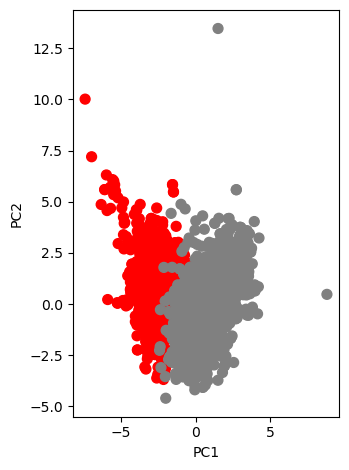

In [272]:
from sklearn.cluster import SpectralClustering

vars_to_standardize = ['fixed.acidity' , 'volatile.acidity' , 'citric.acid' , 'residual.sugar' , 'chlorides' , 'free.sulfur.dioxide' , 'total.sulfur.dioxide' , 'density' , 'pH' , 'sulphates', 'alcohol']
scaler = StandardScaler()
df_properties[vars_to_standardize] = scaler.fit_transform(df_properties[vars_to_standardize])

pca = PCA(n_components=7)
pca_results = pca.fit_transform(df_properties[vars_to_standardize])


n_clusters = 2
spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', n_neighbors=10, random_state=42)
spectral_labels = spectral_clustering.fit_predict(pca_results)


redwhite_df = pd.DataFrame(data=pca_results, columns=[f'PC{i+1}' for i in range(pca_results.shape[1])])  
redwhite_df['Spectral Cluster'] = spectral_labels
redwhite_df['Wine Color'] = df['color']

plt.subplot(1, 2, 2)
plt.scatter(redwhite_df['PC1'], redwhite_df['PC2'], c=redwhite_df['Wine Color'].map({'red': 'red', 'white': 'grey'}), marker='o', s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.tight_layout()
plt.show()

The Spectral Clustering done for Red and White wine seems to be creating distinct clusters to determine the color of wine.

**Running Spectral Clustering post PCA for Good and Bad Quality Wine**

In [278]:
from sklearn.cluster import SpectralClustering

vars_to_standardize = ['fixed.acidity' , 'volatile.acidity' , 'citric.acid' , 'residual.sugar' , 'chlorides' , 'free.sulfur.dioxide' , 'total.sulfur.dioxide' , 'density' , 'pH' , 'sulphates', 'alcohol']
scaler = StandardScaler()
df_properties[vars_to_standardize] = scaler.fit_transform(df_properties[vars_to_standardize])

pca = PCA(n_components=7)
pca_results = pca.fit_transform(df_properties[vars_to_standardize])

n_clusters = 2
spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', n_neighbors=10, random_state=42)
spectral_labels = spectral_clustering.fit_predict(pca_results)

gb_df = pd.DataFrame(data=pca_results, columns=[f'PC{i+1}' for i in range(pca_results.shape[1])])
gb_df['Quality'] = 'High'


for index in range(len(gb_df)):
        if df['quality'].iloc[index] > 5:
            gb_df.at[index, 'Quality'] = 'Low'


plt.subplot(1, 2, 2)
plt.scatter(gb_df['PC1'], gb_df['PC2'], c=gb_df['Quality'].map({'High': 'blue', 'Low': 'green'}), marker='o', s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.tight_layout()
plt.show()

Post Running Spectral Clustering we can see the clustering is not very distinctive to determine the quality of wine.

<br>

#### Market segmentation

In [342]:
market_pca = pd.read_csv('/Users/advaith/Desktop/MSBA Related coursework/Summer term/Intro to ML/2nd Half/social_marketing.csv')
market_pca.head()

Unnamed: 0  chatter  current_events  travel  photo_sharing  uncategorized  \
0  hmjoe4g3k        2               0       2              2              2   
1  clk1m5w8s        3               3       2              1              1   
2  jcsovtak3        6               3       4              3              1   
3  3oeb4hiln        1               5       2              2              0   
4  fd75x1vgk        5               2       0              6              1   

   tv_film  sports_fandom  politics  food  family  home_and_garden  music  \
0        1              1         0     4       1                2      0   
1        1              4         1     2       2                1      0   
2        5              0         2     1       1                1      1   
3        1              0         1     0       1                0      0   
4        0              0         2     0       1                0      0   

   news  online_gaming  shopping  health_nutrition  college_uni  \
0     0              0         1                17            0   
1     0              0         0                 0            0   
2     1              0         2                 0            0   
3     0              0         0                 0            1   
4     0              3         2                 0            4   

   sports_playing  cooking  eco  computers  business  outdoors  crafts  \
0               2        5    1          1         0         2       1   
1               1        0    0          0         1         0       2   
2               0        2    1          0         0         0       2   
3               0        0    0          0         1         0       3   
4               0        1    0          1         0         1       0   

   automotive  art  religion  beauty  parenting  dating  school  \
0           0    0         1       0          1       1       0   
1           0    0         0       0          0       1       4   
2           0    8         0       1          0       1       0   
3           0    2         0       1          0       0       0   
4           0    0         0       0          0       0       0   

   personal_fitness  fashion  small_business  spam  adult  
0                11        0               0     0      0  
1                 0        0               0     0      0  
2                 0        1               0     0      0  
3                 0        0               0     0      0  
4                 0        0               1     0      0

In [345]:
market_new_pca = market_pca.rename(columns={'Unnamed: 0': 'user_id'}).set_index('user_id')

In [349]:
#EDA
summary_stats_pca = market_new_pca.describe()
print(summary_stats_pca)

           chatter  current_events       travel  photo_sharing  uncategorized  \
count  7882.000000     7882.000000  7882.000000    7882.000000    7882.000000   
mean      4.398757        1.526262     1.585004       2.696777       0.812992   
std       3.529126        1.268890     2.285530       2.731510       0.935853   
min       0.000000        0.000000     0.000000       0.000000       0.000000   
25%       2.000000        1.000000     0.000000       1.000000       0.000000   
50%       3.000000        1.000000     1.000000       2.000000       1.000000   
75%       6.000000        2.000000     2.000000       4.000000       1.000000   
max      26.000000        8.000000    26.000000      21.000000       9.000000   

           tv_film  sports_fandom     politics         food       family  \
count  7882.000000    7882.000000  7882.000000  7882.000000  7882.000000   
mean      1.070287       1.594012     1.788632     1.397488     0.863867   
std       1.658783       2.160917     3.03

In [352]:
spam_distribution_pca = market_new_pca['spam'].value_counts()
adult_distribution_pca = market_new_pca['adult'].value_counts()

In [355]:
# data standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
market_new_pca = scaler.fit_transform(market_new_pca)

In [358]:
# Dimensionality Reduction with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
market_pca = pca.fit_transform(market_new_pca)

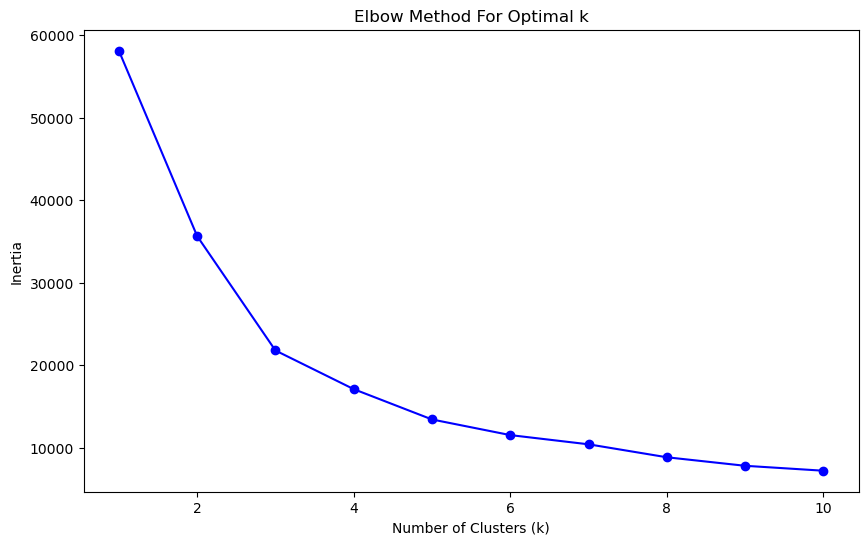

In [361]:
# K- means clustering 
from sklearn.cluster import KMeans
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(market_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [364]:
# apply K- means clustering 

kmeans_pca = KMeans(n_clusters=4, random_state=42)
clusters = kmeans_pca.fit_predict(market_pca)
market_new_pca = pd.DataFrame(market_new_pca)

market_new_pca = market_new_pca.reset_index(drop=True)  # Resets the index if there's any issue
market_new_pca['Cluster'] = clusters

In [367]:
# Visualize and Analyze the Clusters
plt.figure(figsize=(10, 6))
plt.scatter(market_pca[:, 0], market_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization')
plt.colorbar(label='Cluster')
plt.show()

In [370]:
cluster_means = market_new_pca.groupby('Cluster').mean()
print(cluster_means)

                0         1         2         3         4         5         6  \
Cluster                                                                         
0       -0.346937 -0.200628 -0.198636 -0.437763 -0.225844 -0.209329 -0.315464   
1        0.785285  0.358812  0.411146  1.314887  0.617019  0.423157 -0.057757   
2       -0.123543  0.130212  0.077580 -0.137753 -0.091367  0.009012  1.961292   
3        0.280366  0.127249  0.124975  0.246637  0.152931  0.158201 -0.168875   

                7         8         9        10        11        12        13  \
Cluster                                                                         
0       -0.212247 -0.377998 -0.297767 -0.207831 -0.275416 -0.181804 -0.176874   
1        0.387886  0.224213  0.209378  0.436689  0.719144  0.289676  0.405773   
2        0.109741  1.700463  1.409211  0.202524  0.021177  0.257048  0.021909   
3        0.141009 -0.085728 -0.100121  0.089800  0.154382  0.081797  0.114010   

               14        1

**Analysis of Cluster Characteristics:**

The data reveals four distinct clusters with varying profiles based on user interests: 
- Cluster 0 has predominantly negative values across most features, indicating users in this segment generally show below-average interest in various topics. 
- Cluster 1, on the other hand, demonstrates high positive values, particularly in features associated with high engagement, suggesting that this group is highly interested in the subjects represented by these features. 
- Cluster 2 stands out with a mix of both positive and high positive values, indicating strong interests in specific topics. 
- Cluster 3 presents a mix of lower values, but with some areas of increased interest, showing moderate engagement. 

**Recommendations for Targeted Messaging:**

To tailor messaging effectively, consider the following insights: 
- For Cluster 1, focus on topics with high engagement, leveraging their strong interest in these areas for more impactful communication. 
- For Cluster 2, emphasize the specific subjects where their interest is high, as they show varied but significant engagement. 
- For Clusters 0 and 3, a more generalized approach might be suitable, with an aim to spark interest in areas where they currently show lower engagement. 
This targeted strategy can help enhance user engagement by aligning content with the preferences of each cluster.

**Without PCA:** 

In [387]:
market = pd.read_csv('/Users/advaith/Desktop/MSBA Related coursework/Summer term/Intro to ML/2nd Half/social_marketing.csv')
market.head()

Unnamed: 0  chatter  current_events  travel  photo_sharing  uncategorized  \
0  hmjoe4g3k        2               0       2              2              2   
1  clk1m5w8s        3               3       2              1              1   
2  jcsovtak3        6               3       4              3              1   
3  3oeb4hiln        1               5       2              2              0   
4  fd75x1vgk        5               2       0              6              1   

   tv_film  sports_fandom  politics  food  family  home_and_garden  music  \
0        1              1         0     4       1                2      0   
1        1              4         1     2       2                1      0   
2        5              0         2     1       1                1      1   
3        1              0         1     0       1                0      0   
4        0              0         2     0       1                0      0   

   news  online_gaming  shopping  health_nutrition  college_uni  \
0     0              0         1                17            0   
1     0              0         0                 0            0   
2     1              0         2                 0            0   
3     0              0         0                 0            1   
4     0              3         2                 0            4   

   sports_playing  cooking  eco  computers  business  outdoors  crafts  \
0               2        5    1          1         0         2       1   
1               1        0    0          0         1         0       2   
2               0        2    1          0         0         0       2   
3               0        0    0          0         1         0       3   
4               0        1    0          1         0         1       0   

   automotive  art  religion  beauty  parenting  dating  school  \
0           0    0         1       0          1       1       0   
1           0    0         0       0          0       1       4   
2           0    8         0       1          0       1       0   
3           0    2         0       1          0       0       0   
4           0    0         0       0          0       0       0   

   personal_fitness  fashion  small_business  spam  adult  
0                11        0               0     0      0  
1                 0        0               0     0      0  
2                 0        1               0     0      0  
3                 0        0               0     0      0  
4                 0        0               1     0      0

In [389]:
market_new = market.rename(columns={'Unnamed: 0': 'user_id'}).set_index('user_id')

In [393]:
spam_distribution = market_new['spam'].value_counts()
adult_distribution = market_new['adult'].value_counts()

In [396]:
# data standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
market_new = scaler.fit_transform(market_new)

In [399]:
# K- means clustering 
from sklearn.cluster import KMeans
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(market_new)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [436]:
# apply K- means clustering 

kmeans_pca = KMeans(n_clusters=4, random_state=42)
clusters = kmeans_pca.fit_predict(market_new)
market_new = pd.DataFrame(market_new)

market_new = market_new.reset_index(drop=True)  # Resets the index if there's any issue
market_new['Cluster'] = clusters

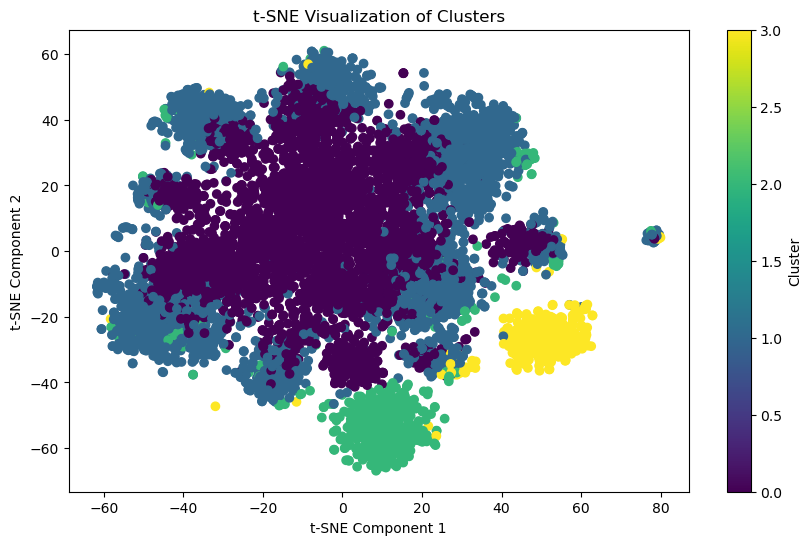

In [438]:
market_new.columns = market_new.columns.astype(str)

from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(market_new)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=market_new['Cluster'], cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Clusters')
plt.colorbar(label='Cluster')
plt.show()

<br>

In [440]:
# Visualize and Analyze the Clusters
cluster_means = market_new.groupby('Cluster').mean()
print(cluster_means)

                0         1         2         3         4         5         6  \
Cluster                                                                         
0       -0.243135 -0.161233 -0.219778 -0.343660 -0.151439 -0.209259 -0.314651   
1        0.359786  0.202471  0.336299  0.250426  0.112646  0.264461  0.517399   
2        0.091868  0.220912  0.010148  1.224384  0.471372 -0.015690 -0.098892   
3       -0.041850 -0.029155 -0.006208 -0.005263  0.073716  0.348339 -0.067343   

                7         8         9        10        11        12        13  \
Cluster                                                                         
0       -0.252111 -0.358883 -0.291093 -0.171003 -0.211744 -0.227189 -0.240299   
1        0.425853  0.567676  0.389650  0.212171  0.152237  0.377847 -0.161451   
2       -0.061695 -0.058602  0.098493  0.147735  0.559706 -0.028386 -0.049649   
3       -0.141958 -0.018407  0.201686  0.097190  0.263483 -0.129510  3.120458   

               14        1

**Analysis of Cluster Characteristics without PCA**

The analysis identifies four distinct clusters with varying engagement levels across different features.
- Cluster 0 exhibits generally negative values, suggesting users in this segment have below-average interest in most topics. 
- Cluster 1 shows positive values, particularly in features associated with moderate to high engagement, indicating a keen interest in certain subjects. 
- Cluster 2 stands out with very high positive values in a few features, reflecting strong interests in those specific areas.
- Cluster 3 presents a more balanced profile with both lower and moderate values, indicating users with more varied but moderate interests.

**Recommendations for Targeted Messaging:**

For effective targeting, tailor messaging based on these insights: 
- For Cluster 1, focus on enhancing engagement with the topics they show a notable interest in. 
- For Cluster 2, develop content that capitalizes on their strong preferences in high-value areas. 
- Cluster 0 may benefit from general content that aims to spark interest and increase engagement.
- Finally, for Cluster 3, consider a broad approach that addresses their diverse interests, with efforts to deepen engagement in areas where they show moderate interest.
This targeted approach can help align messaging with each cluster's unique preferences and improve overall engagement.

**Conclusion:**

The first output with PCA is useful for a quick overview but lacks the depth needed for nuanced strategy development. 
The second output  with t-SNE is generally preferred due to its greater detail and specificity. 
It provides a clearer understanding of each cluster's profile by explicitly addressing the range of values and how they relate to user interests. 
This level of detail helps in crafting more targeted and effective messaging strategies.

#### The Reuters corpus

Loading in the dataset

In [1]:
import os
import pandas as pd

folder_path = '/Users/advaith/Desktop/MSBA Related coursework/Summer term/Intro to ML/2nd Half/C50train'

authors_list = ['AaronPressman','AlanCrosby','AlanCrosby','AlexanderSmith','BenjaminKangLim','BernardHickey', 'BradDorfman', 'DarrenSchuettler','DavidLawder','EdnaFernandes','EricAuchard','FumikoFujisaki','GrahamEarnshaw','HeathersScoffiled','JaneMacartney','JanLopatka','JimGilchrist','JoeOrtiz','JohnMastrini','JonathanBirt','JoWinterbottom','KarlPenhaul','KeithWeir','KevinDrawbaugh','KevinMorrison','KirstinRidley','KouroshKarimkhany','LydiaZajc','LynnleyBrowning','MarcelMichelson','MarkBendeich','MartinWolk','MatthewBunce','MichaelConnor','MureDickie','NickLouth','PatriciaCommins','PeterHumphrey','PierreTran','RobinSidel','RogerFillion','SamuelPerry','SarahDavison','ScottHillis','SimonCowell','TanEeLyn','TheresePoletti','TimFarrand','ToddNissen','WilliamKazer', 'LynneO\'Donnell']
texts = []
authors= []

for author in authors_list:
    author_folder = os.path.join(folder_path, author)
    if os.path.isdir(author_folder):  # Check if it's a directory
        # Loop through each file in the author's folder
        for file_name in os.listdir(author_folder):
            if file_name.endswith('.txt'):
                file_path = os.path.join(author_folder, file_name)
                with open(file_path, 'r', encoding='utf-8') as file:
                    texts.append(file.read())
                    authors.append(author)

df = pd.DataFrame({'Author': authors, 'Text': texts})


#mask = df['Author'] == 'LynneO\'Donnell'  
#Above is to check if all authors have been loaded in

**Analysis being performed:** 

Author Similarity and Clustering: To identify groups of authors with similar writing styles.

**Business Use Case:** 

Identifying groups of authors with similar writing styles enables news websites, blogs, or online magazines to personalize content feeds for users. If a reader enjoys articles by a particular author, the platform can recommend content from other authors with a similar style to keep the reader hooked on to the website.

This can enhance content personalization and ensure a consistent flow of material, even if content from a particular author is exhausted by the reader.

***Pre-Processing***

In [26]:
df = df.dropna() #Dropping any NaNs

#Converting all Text into lower case

df['Text'] = df['Text'].str.lower()

#For uniformity, converting the author column to lower case as well

df['Author'] = df['Author'].str.lower()

#Using TF-IDF to transform the “Text” data into numerical features.

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Fit and transform the text data
tfidf_matrix = vectorizer.fit_transform(df['Text'])

***Dimensionality Reduction Using t-SNE***

In [196]:
from sklearn.manifold import TSNE

# Perform t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(tfidf_matrix.toarray())

***KNN***

In [197]:
from sklearn.neighbors import NearestNeighbors
k = 20
knn = NearestNeighbors(n_neighbors=k)
knn.fit(tsne_results)
distances, indices = knn.kneighbors(tsne_results)

In [199]:
import matplotlib.pyplot as plt

# Plot the t-SNE results with an increased figure size
plt.figure(figsize=(20, 15))  # Increase the plot size (width=20, height=15)

# Scatter plot with color coding based on KNN clusters (use the first neighbor as a proxy for cluster)
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=indices[:, 0], cmap='viridis', alpha=0.6)

# Label only a subset of points to avoid clutter (e.g., every 20th point)
for i in range(0, len(df), 20):
   plt.text(tsne_results[i, 0], tsne_results[i, 1], df['Author'].iloc[i], fontsize=10, alpha=0.7)

plt.title("t-SNE Visualization with K-Nearest Neighbors", fontsize=16)
plt.colorbar(label='KNN Cluster Index', shrink=0.8)  # Add a colorbar and reduce its size slightly
plt.show()

It's hard to interpret the results here. 
I'll print out the results rather

In [104]:
#This code block is done using ChatGPT 

from collections import Counter

# Collect pairs of authors who are nearest neighbors
neighbor_pairs = []

for i in range(len(df)):
    for j in range(1, 4):  # Check the first 3 neighbors
        pair = tuple(sorted([df['Author'].iloc[i], df['Author'].iloc[indices[i, j]]]))
        neighbor_pairs.append(pair)

# Count how often each pair appears
pair_counts = Counter(neighbor_pairs)

# Display the most common pairs
most_common_pairs = pair_counts.most_common(10)
print("Most Common Author Pairs:")
for pair, count in most_common_pairs:
    print(f"{pair}: {count} times")

Most Common Author Pairs:
('alancrosby', 'alancrosby'): 280 times
('fumikofujisaki', 'fumikofujisaki'): 144 times
('jimgilchrist', 'jimgilchrist'): 139 times
('lynnleybrowning', 'lynnleybrowning'): 134 times
('matthewbunce', 'matthewbunce'): 131 times
('karlpenhaul', 'karlpenhaul'): 130 times
('rogerfillion', 'rogerfillion'): 129 times
('lydiazajc', 'lydiazajc'): 126 times
("lynneo'donnell", "lynneo'donnell"): 124 times
('aaronpressman', 'aaronpressman'): 120 times


All the author pairs are pairing with itself which is understandable since it's KNN. 

Trying out K-Means to check if we get better results

***K-means***

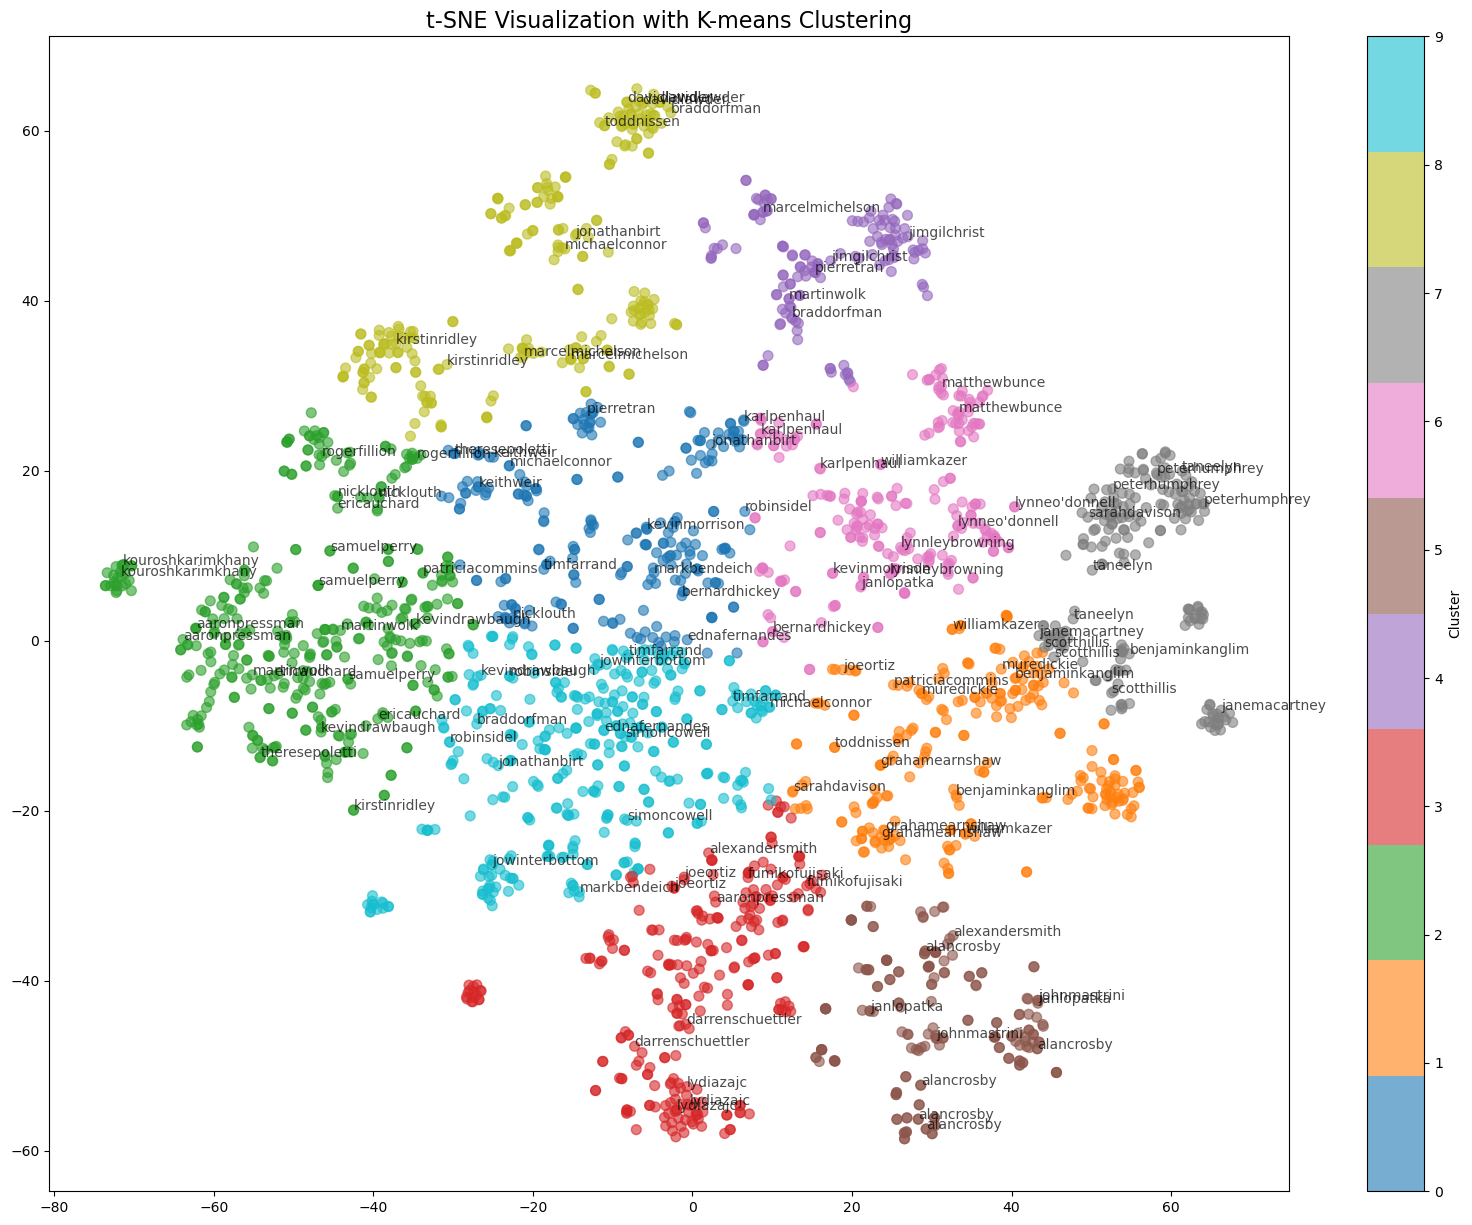

In [171]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Apply K-means clustering
kmeans = KMeans(n_clusters=10, random_state=42)  # Adjust the number of clusters as needed
kmeans.fit(tsne_results)  # Use t-SNE results or directly on the TF-IDF matrix

# Assign cluster labels to the authors
df['Cluster'] = kmeans.labels_

# Plot the t-SNE results with K-means clustering
plt.figure(figsize=(20, 15))  # Further increase the plot size

# Scatter plot with reduced point size
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df['Cluster'], cmap='tab10', s=50, alpha=0.6)

# Annotate only a subset of points to reduce clutter (e.g., every 20th point)
for i in range(0, len(df), 20):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], df['Author'].iloc[i], fontsize=10, alpha=0.7)

plt.title("t-SNE Visualization with K-means Clustering", fontsize=16)
plt.colorbar(scatter, label='Cluster')
plt.show()

In [181]:
#This code block is done using ChatGPT 

from collections import Counter

# Collect pairs of authors who are in the same cluster
cluster_pairs = []

for cluster in df['Cluster'].unique():
    # Get all authors in the current cluster
    authors_in_cluster = df[df['Cluster'] == cluster]['Author'].values
    # Create pairs of authors within this cluster
    for i in range(len(authors_in_cluster)):
        for j in range(i + 1, len(authors_in_cluster)):
            pair = tuple(sorted([authors_in_cluster[i], authors_in_cluster[j]]))
            cluster_pairs.append(pair)

# Count how often each pair appears
pair_counts = Counter(cluster_pairs)

# Display the most common pairs
most_common_pairs = pair_counts.most_common(10)
print("Most Common Author Pairs within the Same Cluster:")
for pair, count in most_common_pairs:
    print(f"{pair}: {count} times")

Most Common Author Pairs within the Same Cluster:
('alancrosby', 'alancrosby'): 4562 times
('alancrosby', 'johnmastrini'): 3574 times
('alancrosby', 'janlopatka'): 3186 times
('kouroshkarimkhany', 'samuelperry'): 2450 times
('kouroshkarimkhany', 'theresepoletti'): 2300 times
('samuelperry', 'theresepoletti'): 2258 times
('kouroshkarimkhany', 'rogerfillion'): 2200 times
('rogerfillion', 'samuelperry'): 2158 times
('fumikofujisaki', 'lydiazajc'): 2116 times
('davidlawder', 'toddnissen'): 2116 times


K means seems to be doing better. Apart from tagging the authors to itself it is also tagging it to other authors as well. 

We can see 

1. alancrosby has the most common writing styles with johnmastrini and janlopatka
2. kouroshkarimkhany has the most common writing styles with samuelperry, theresepoletti and rogerfillion 
3. fumikofujisaki has the most common writing style with lydiazajc
4. davidlawder has the most common writing style with toddnissen

While doing research on this topic on the internet I also found that we can do cosine similarity and solve this problem statement

***Performing Cosine Similarity***

In [210]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# Assume 'tfidf_matrix' is your matrix after applying TF-IDF
# Compute the cosine similarity matrix between all authors
similarity_matrix = cosine_similarity(tfidf_matrix)

# Initialize a list to store the most similar authors
most_similar_authors = []

# Loop through each author and find their most similar author
for i in range(len(df)):
    # Exclude self-similarity by setting the diagonal to -1
    similarity_matrix[i, i] = -1
    most_similar_author_index = np.argmax(similarity_matrix[i])
    most_similar_author = df['Author'].iloc[most_similar_author_index]
    most_similar_authors.append({
        'Author': df['Author'].iloc[i],
        'Most Similar Author': most_similar_author,
        'Similarity Score': similarity_matrix[i, most_similar_author_index]
    })

# Convert to DataFrame for easier viewing
similarity_df = pd.DataFrame(most_similar_authors)

In [216]:
import numpy as np

# Define a threshold for high similarity
threshold = 0.8

# Initialize a list to store groups of highly similar authors
similar_author_groups = []

# Loop through the similarity matrix to find groups of authors with high mutual similarity
for i in range(len(df)):
    for j in range(i+1, len(df)):  # Ensure j > i to avoid self-matches and duplicates
        if similarity_matrix[i, j] >= threshold and df['Author'].iloc[i] != df['Author'].iloc[j]:
            similar_author_groups.append((df['Author'].iloc[i], df['Author'].iloc[j]))

# Print the groups of highly similar authors, excluding self-matches
print("Groups of Highly Similar Authors (excluding self-matches):")
for pair in similar_author_groups:
   print(pair)

After Performing Cosine Similarity we can see the results are consistent with that of K-means.

*PS: I did not printout the results while submitting the notebook since it's long but if you wish you can run the above codeblock to check it*

## Association rule mining

In [451]:
#!pip install mlxtend #

#Install the above for running the following code blocks in this problem.

In [453]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [457]:
file_path = '/Users/advaith/Desktop/MSBA Related coursework/Summer term/Intro to ML/2nd Half/groceries.txt'
with open(file_path, 'r') as file:
    transactions = [line.strip().split(',') for line in file]

# Convert the list of transactions into a one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [460]:
df.head(2)

Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                  False     False             False             False   
1                  False     False             False             False   

   baby cosmetics  baby food   bags  baking powder  bathroom cleaner   beef  \
0           False      False  False          False             False  False   
1           False      False  False          False             False  False   

   berries  beverages  bottled beer  bottled water  brandy  brown bread  \
0    False      False         False          False   False        False   
1    False      False         False          False   False        False   

   butter  butter milk  cake bar  candles  candy  canned beer  canned fish  \
0   False        False     False    False  False        False        False   
1   False        False     False    False  False        False        False   

   canned fruit  canned vegetables  cat food  cereals  chewing gum  chicken  \
0         False              False     False    False        False    False   
1         False              False     False    False        False    False   

   chocolate  chocolate marshmallow  citrus fruit  cleaner  cling film/bags  \
0      False                  False          True    False            False   
1      False                  False         False    False            False   

   cocoa drinks  coffee  condensed milk  cooking chocolate  cookware  cream  \
0         False   False           False              False     False  False   
1         False    True           False              False     False  False   

   cream cheese  cream cheese    curd  curd cheese  decalcifier  dental care  \
0         False          False  False        False        False        False   
1         False          False  False        False        False        False   

   dessert  detergent  dish cleaner  dishes  dog food  domestic eggs  \
0    False      False         False   False     False          False   
1    False      False         False   False     False          False   

   female sanitary products  finished products   fish  flour  flower (seeds)  \
0                     False              False  False  False           False   
1                     False              False  False  False           False   

   flower soil/fertilizer  frankfurter  frozen chicken  frozen dessert  \
0                   False        False           False           False   
1                   False        False           False           False   

   frozen fish  frozen fruits  frozen meals  frozen potato products  \
0        False          False         False                   False   
1        False          False         False                   False   

   frozen vegetables  fruit/vegetable juice  grapes  hair spray    ham  \
0              False                  False   False       False  False   
1              False                  False   False       False  False   

   hamburger meat  hard cheese  herbs  honey  house keeping products  \
0           False        False  False  False                   False   
1           False        False  False  False                   False   

   hygiene articles  ice cream  instant coffee    jam  ketchup  \
0             False      False           False  False    False   
1             False      False           False  False    False   

   kitchen towels  kitchen utensil  light bulbs  liqueur  liquor  \
0           False            False        False    False   False   
1           False            False        False    False   False   

   liquor (appetizer)  liver loaf  long life bakery product  make up remover  \
0               False       False                     False            False   
1               False       False                     False            False   

   male cosmetics  margarine  mayonnaise   meat  meat spreads  \
0           False       True       False  False         False   
1           Fals

**Confidence Threshold:** I'll choose a threshold of 0.5 (50%). This means that for a rule 𝐴→𝐵
there is at least a 50% chance that item B is present in transactions containing item A. A 50% confidence threshold is strong enough to filter out weaker associations while still retaining meaningful patterns.

**Lift Threshold:** I'll choose a threshold of 1.2. Lift measures how much more likely item B is to be purchased when item A is purchased, compared to if they were independent. A lift greater than 1 suggests a positive association, and 1.2 is a reasonable threshold to identify rules with stronger-than-average association, while still capturing a good number of rules.

In [466]:
# Step 1: Identify Frequent Itemsets
frequent_itemsets = apriori(df, min_support=0.005, use_colnames=True) 

# Step 2: Generate Association Rules with lower thresholds
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5) 
rules = rules[rules['lift'] >= 1.2]  

# Convert lift to numeric
rules['lift'] = pd.to_numeric(rules['lift'], errors='coerce')

# Drop any rows with NaN values in lift
rules.dropna(subset=['lift'], inplace=True)

# Check the first few rows of the rules DataFrame
print("Association Rules after filtering:")
print(rules.head())

# Ensure there are rules left after filtering
if rules.empty:
    print("No rules found with the given thresholds.")
else:
    # Visualization: Top 20 rules by lift
    top_rules = rules.nlargest(20, 'lift')

    # Plotting the top rules
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=top_rules, x='support', y='confidence', size='lift', hue='lift', legend=False, sizes=(40, 400), palette="viridis")
    plt.title('Top 10 Association Rules by Lift')
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.show()

Association Rules after filtering:
               antecedents   consequents  antecedent support  \
0          (baking powder)  (whole milk)            0.017692   
1       (rolls/buns, beef)  (whole milk)            0.013625   
2           (yogurt, beef)  (whole milk)            0.011693   
3   (bottled beer, yogurt)  (whole milk)            0.009253   
4  (butter, bottled water)  (whole milk)            0.008948   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.255516  0.009253    0.522989  2.046793  0.004732    1.560725   
1            0.255516  0.006812    0.500000  1.956825  0.003331    1.488968   
2            0.255516  0.006101    0.521739  2.041904  0.003113    1.556648   
3            0.255516  0.005186    0.560440  2.193364  0.002821    1.693701   
4            0.255516  0.005389    0.602273  2.357084  0.003103    1.871845   

   zhangs_metric  
0       0.520642  
1       0.495722  
2       0.516298  
3       0.549160  
4       0.

In [469]:
top_rules.sort_values(by = 'confidence', ascending = False).head(10)

antecedents         consequents  \
119      (root vegetables, yogurt, tropical fruit)        (whole milk)   
99     (whole milk, citrus fruit, root vegetables)  (other vegetables)   
103       (whole milk, pip fruit, root vegetables)  (other vegetables)   
67                 (pip fruit, whipped/sour cream)  (other vegetables)   
63                       (root vegetables, onions)  (other vegetables)   
22                 (citrus fruit, root vegetables)  (other vegetables)   
109  (whole milk, root vegetables, tropical fruit)  (other vegetables)   
72               (root vegetables, tropical fruit)  (other vegetables)   
12                    (whipped/sour cream, butter)  (other vegetables)   
76            (tropical fruit, whipped/sour cream)  (other vegetables)   

     antecedent support  consequent support   support  confidence      lift  \
119            0.008134            0.255516  0.005694    0.700000  2.739554   
99             0.009151            0.193493  0.005796    0.633333  3.273165   
103            0.008948            0.193493  0.005491    0.613636  3.171368   
67             0.009253            0.193493  0.005592    0.604396  3.123610   
63             0.009456            0.193493  0.005694    0.602151  3.112008   
22             0.017692            0.193493  0.010371    0.586207  3.029608   
109            0.011998            0.193493  0.007016    0.584746  3.022057   
72             0.021047            0.193493  0.012303    0.584541  3.020999   
12             0.010168            0.193493  0.005796    0.570000  2.945849   
76             0.013828            0.193493  0.007829    0.566176  2.926088   

     leverage  conviction  zhangs_metric  
119  0.003616    2.481613       0.640185  
99   0.004025    2.199566       0.700899  
103  0.003759    2.087431       0.690860  
67   0.003802    2.038671       0.686207  
63   0.003864    2.027167       0.685143  
22   0.006948    1.949059       0.681990  
109  0.004694    1.942201       0.677225  
72   0.008231    1.941244       0.683367  
12   0.003828    1.875599       0.667324  
76   0.005154    1.859068       0.667477

In [472]:
rules['consequents'].unique()

array([frozenset({'whole milk'}), frozenset({'other vegetables'}),
       frozenset({'yogurt'})], dtype=object)

**Notes:** 

**High lift values:** Rules closer to the top right corner have higher lift values, indicating a stronger association between the items. This means that the occurrence of one item is more likely given the occurrence of the other item compared to their individual probabilities.

Trade-off between support and confidence: Some rules may have high confidence but low support, meaning they are less frequent but more reliable. Others may have high support but lower confidence, meaning they are more common but less predictive.

**Clustering:** The data points may form clusters or patterns, suggesting relationships between different groups of rules

**Summary:**

1. From the above graph, we can note that our algoithm is able to extract two most frequent rules which have support value > 0.010.
(root vegetables, tropical fruit)->(other vegetables)
(citrus fruit, root vegetables)->(other vegetables)	

2. The following rule has the highest confidence which means it is more reliable but has less occurences. 
(root vegetables, tropical fruit, yogurt)->(whole milk). 